# ADM HW 2. Questions 1,2,4,7

In [3]:
#Loading datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('/home/dias/Desktop/HW/2020-Apr.csv')
name ='April'
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-04-01 00:00:00 UTC,view,1201465,2232732101407408685,apparel.shoes.slipons,samsung,230.38,568984877,e2456cef-2d4f-42b9-a53a-8893cb0c6851
1,2020-04-01 00:00:01 UTC,view,1307156,2053013554658804075,electronics.audio.headphone,apple,1352.67,514955500,38f43134-de83-4710-ae0a-326677d292c6
2,2020-04-01 00:00:01 UTC,view,1480477,2053013563835941749,appliances.kitchen.refrigerators,apple,1184.05,633645770,16aba270-b3c2-4b23-be0a-b7c80bc9da9e
3,2020-04-01 00:00:02 UTC,view,1307050,2053013554658804075,electronics.audio.headphone,apple,1724.34,564933778,05b443bd-e68a-4d72-b971-80bd31109cb8
4,2020-04-01 00:00:03 UTC,view,9500109,2232732104175649385,apparel.scarf,defender,25.05,530206135,e3c1fb4b-0a7e-457d-a0cf-5d1479e9aafc


In [4]:
#Setting numbers to show in float 
pd.set_option('float_format', '{:f}'.format)

In [4]:
#Getting information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66589268 entries, 0 to 66589267
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 4.5+ GB


In [5]:
df.describe()

,product_id,category_id,price,user_id
count,66589268.000000,66589268.000000,66589268.000000,66589268.000000
mean,35190201.407239,2180717230957448960.000000,273.333772,582774378.744593
std,41935772.020556,81232099676965536.000000,356.078544,48884439.814091
min,1000365.000000,2053013551857008896.000000,0.000000,27396220.000000
25%,2602135.000000,2053013562778977024.000000,51.460000,533506193.000000
50%,12200908.000000,2232732092767142144.000000,148.910000,587620819.000000
75%,100022400.000000,2232732098446230016.000000,342.350000,633779462.000000
max,100234250.000000,2298840883472105984.000000,2574.070000,649775983.000000


In [6]:
df.dtypes

event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object

## [RQ1] A marketing funnel describes your customer’s journey with your e-commerce. It may involve different stages, beginning when someone learns about your business, when he/she visits your website for the first time, to the purchasing stage, marketing funnels map routes to conversion and beyond. Suppose your funnel involves just three simple steps: 1) view, 2) cart, 3) purchase. Which is the rate of complete funnels? 

In [10]:
df.event_type.unique()

array(['view', 'cart', 'purchase'], dtype=object)

In [11]:
#Here I group all event_time values by product_id and user_id 
table1 = pd.pivot_table(df, values='event_time', index=['product_id','user_id'],
                    columns=['event_type'], aggfunc=len)
a=table1.dropna()
complete_funnels = a.min(axis=1).sum()
#I drop rows where at least one of them wasn't made, count sum and divide by total length
print('Rate of complete funnels in {} = {}'.format(name,complete_funnels/len(table1)))

Rate of complete funnels in April = 0.027103774083856516


### What’s the operation users repeat more on average within a session? Produce a plot that shows the average number of times users perform each operation (view/removefromchart etc etc).

In [12]:
#Here I grouped by session and took all average numbers of events in event_type
mean=[]
for i in df.event_type.unique():
    mean.append(df[df.event_type == i].groupby(['user_session']).event_type.count())
for i in range(len(mean)):
    mean[i]=mean[i].mean()
mean

[5.35877772061719, 1.7898725124429191, 1.2299634988670527]

The operation users repeat more on average within a session in April: 


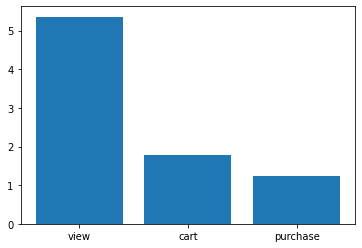

In [13]:
#and then plot a bar, and took tha name of event with highest number
plt.bar(df.event_type.unique(),mean);
print('The operation users repeat more on average within a session in {}: '.format(name, df.event_type.unique()[0]))

### How many times, on average, a user views a product before adding it to the cart?

In [ ]:
#I made a pivot table of the times of first events that users made
table = pd.pivot_table(df, values='event_time', index=['product_id','user_id'],
                    columns=['event_type'], aggfunc=min)
table

In [ ]:
#and then counted probability of user to view a product before buying
answer = len(table[table['view']<table['cart']])/len(table)
answer

### What’s the probability that products added once to the cart are effectively bought?

In [ ]:
# the same pivot from above, counting all rows with time of 'cart' before the 'purchase' and divide by total length
answer = len(table[table['cart']<table['purchase']])/len(table['cart'].dropna())
answer

## [RQ2] What are the categories of the most trending products overall? For each month visualize this information through a plot showing the number of sold products per category. 

In [7]:
import seaborn as sns
#split category_code into 'category' and 'subcategory' columns
df[['category', 'subcategory']] = df['category_code'].str.split('.', 1, expand=True)
#count number of purchases of products and sort in descending order
group_purchase_by_cat=df[df['event_type']=='purchase'].groupby(['product_id','category']).count()

In [8]:
group_purchase_by_cat['user_id'].sort_values(ascending=False).head(10)
#As you can see the category of most trending products is electronics

product_id  category    
1005100     construction    26230
1005212     construction    22227
100068488   construction    14915
100068493   construction    13932
1004836     construction    12977
1002544     construction    10849
1005160     construction    10291
4804056     sport            8929
1004856     construction     8928
1005115     construction     8873
Name: user_id, dtype: int64

/home/dias/TTS/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of purchases')

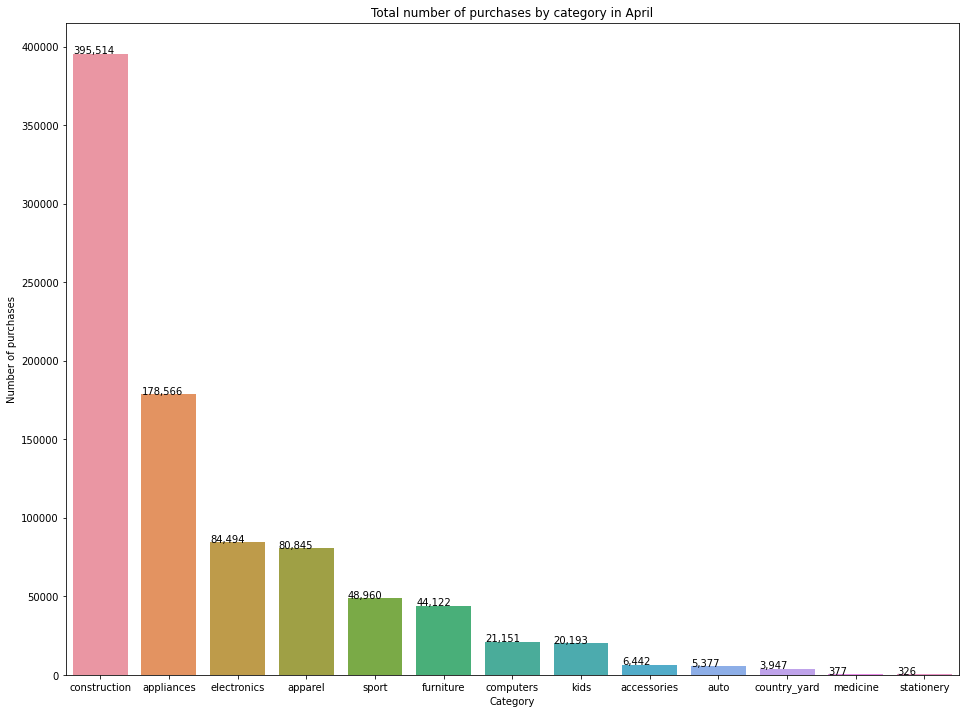

In [9]:
group_purchase_by_cat=df[df['event_type']=='purchase'].groupby(['category'])['price'].count()
sorted_group_purchase_by_cat = group_purchase_by_cat.dropna().sort_values(ascending=False)
plt.figure(figsize =(16, 12)) 
index_category = [str(i) for i in sorted_group_purchase_by_cat.index]
ax= sns.barplot(index_category,sorted_group_purchase_by_cat)
for p in ax.patches:
    ax.annotate(format(p.get_height(),',.0f'), (p.get_x() , p.get_height()),)
plt.title('Total number of purchases by category in {}'.format(name))
plt.xlabel('Category')
plt.ylabel('Number of purchases')

### Plot the most visited subcategories.

/home/dias/TTS/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of views')

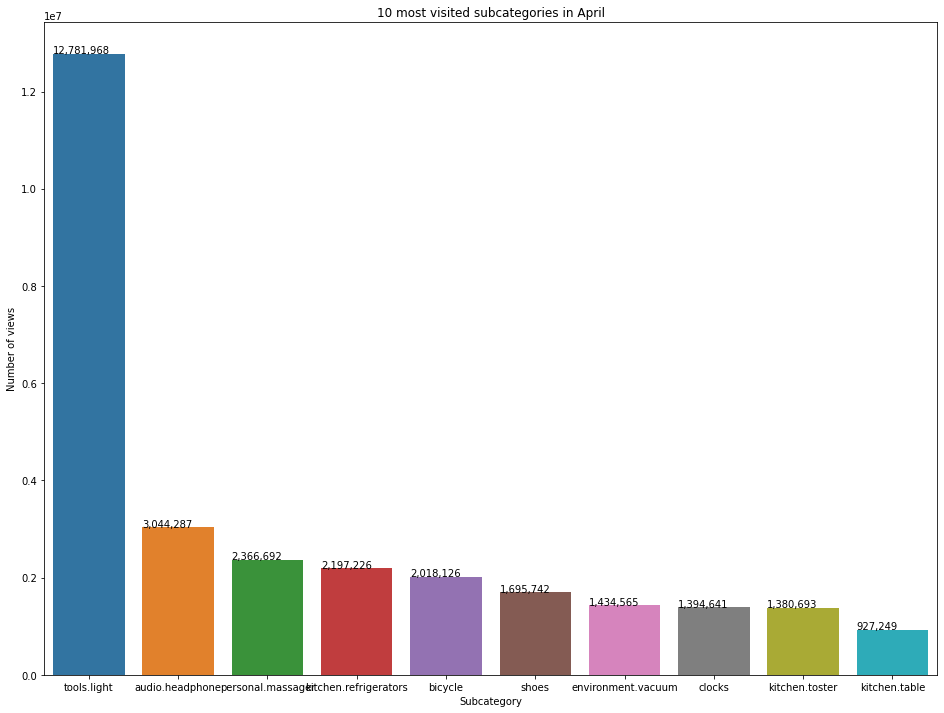

In [10]:
group_view_by_subcat=df[df['event_type']=='view'].groupby(['subcategory'])['price'].count()
sorted_group_view_by_subcat = group_view_by_subcat.dropna().sort_values(ascending=False)
plt.figure(figsize =(16, 12)) 
index_category = [str(i) for i in sorted_group_view_by_subcat.index]
ax= sns.barplot(index_category[:10],sorted_group_view_by_subcat[:10])
for p in ax.patches:
    ax.annotate(format(p.get_height(),',.0f'), (p.get_x() , p.get_height()),)
plt.title('10 most visited subcategories in {}'.format(name))
plt.xlabel('Subcategory')
plt.ylabel('Number of views')

### What are the 10 most sold products per category?

In [11]:
#Delete nan in order to avoid error
bf = df['category'].unique()
for i in bf:
    try:
        #make pivot table for each category, and sort values in descending order
        table4 = pd.pivot_table(df[df['category']==i], values='event_time', index=['category','product_id'],
                        columns=['event_type'], aggfunc=len)
        print(table4['purchase'].dropna().sort_values(ascending =False)[:9])
    except:
        print('No purchases in {}'.format(i))

category  product_id
apparel   5100816      4040.000000
          100190575    2821.000000
          100058915    1093.000000
          1201465       814.000000
          4100277       777.000000
          4100126       719.000000
          1201567       662.000000
          1201564       514.000000
          1201526       504.000000
Name: purchase, dtype: float64
category     product_id
electronics  100011103    3222.000000
             1307545      1828.000000
             100170834    1823.000000
             1307555      1383.000000
             100104755    1003.000000
             100055405     980.000000
             5100855       753.000000
             100104481     721.000000
             100120437     685.000000
Name: purchase, dtype: float64
category    product_id
appliances  1801690      2862.000000
            3700926      2328.000000
            1801881      2154.000000
            1802005      1800.000000
            1801766      1672.000000
            2702277      160

## [RQ4] How much does each brand earn per month? 

In [12]:
#made a pivot table to sum the selling price per each brand
brand_sum = pd.pivot_table(df, values='price', index=['brand'],
                    columns=['event_type'], aggfunc=sum)
brand_sum

event_type,cart,purchase,view
brand,,,
a-case,18654.540000,6071.230000,493032.290000
a-derma,1724.920000,116.860000,19842.280000
a-elita,50.940000,8.490000,2841.020000
a-mega,903.510000,193.060000,32469.340000
a-product,27.270000,6.560000,20.640000
...,...,...,...
zuru,44.020000,nan,4532.020000
zwerg,nan,nan,105.680000
zwilling,1341.550000,nan,772878.180000


In [13]:
#How much does each brand earn per month?
brand_revenue = brand_sum['purchase'].sort_values(ascending=False)
brand_revenue

brand
apple      74288067.379995
samsung    56791598.490056
xiaomi     12104816.440000
lg          7539392.840000
acer        6954180.020000
                 ...      
zuru                   nan
zwerg                  nan
zwilling               nan
zx                     nan
zyxel                  nan
Name: purchase, Length: 4885, dtype: float64

### Write a function that given the name of a brand in input returns, for each month, its profit.

In [14]:
# Function that given the name of a brand in input returns, for each month, its profit. 
def profit_of_brand(brand_name,month):
    return month['purchase'][brand_name]

def profit_of_brand_for_each_month(brand_name,list_of_months):
    return [i['purchase'][brand_name] for i  in list_of_months]

### Is the average price of products of different brands significantly different? 

In [15]:
#Is the average price of products of different brands significantly different? 

table3 = pd.pivot_table(df, values='price', index=['subcategory','brand'],

                    columns=['event_type'], aggfunc='mean')
table3[:50]


event_type                                     cart   purchase       view
subcategory             brand                                            
accessories.alarm       absolutechampion        nan        nan  10.300000
                        appollo           54.060000  54.060000  54.060000
                        autoline                nan        nan 351.100000
                        avis              58.770000  50.190000  56.570724
                        body-solid       341.320000 341.320000 341.320000
                        centurion               nan        nan  33.460000
                        dds              360.110000 360.110000 360.110000
                        decathlon         27.228661  27.793448  27.536815
                        domyos            27.847473  27.470000  29.318813
                        dsk                     nan        nan  67.695000
                        ersport           27.030000        nan  27.030000
                        farcar            18.020000        nan  18.020000
                        incar             24.710000  12.870000  32.673461
                        kgb                     nan        nan  84.940000
                        mydean            25.997419  26.978000  23.638059
                        pandora                 nan        nan 209.908000
                        phantom           12.870000  12.870000  12.870000
                        romana            48.062000  45.991429  53.313151
                        scher-khan              nan        nan  91.755294
                        silapro                 nan        nan  15.960000
                        sparta                  nan        nan  29.320000
                        starline         217.250000        nan 215.360886
                        swat              36.743226  38.547500  38.196536
                        tomahawk                nan        nan  86.580909
                        torneo            22.650000  22.650000  22.650000
                        tuka              16.730000  16.730000  16.730000
accessories.anti_freeze alvitek                 nan        nan  20.367500
                        bartek            46.080000        nan  46.080000
                        belezza                 nan        nan  20.890000
                        biomecanics       47.912558  47.637857  50.925860
                        bugaboo                 nan        nan 141.550000
                        casaconforte            nan        nan  17.140000
                        garvalin          44.924429  45.302857  48.193380
                        intex                   nan        nan  69.350000
                        marko             43.220000  43.220000  45.242870
                        minimen           40.085000  43.117500  37.845993
                        minno             38.452784  38.776866  39.063877
                        neposeda                nan        nan  25.230000
                        pablosky          47.640294  48.337000  47.355417
                        perlina           39.870000  39.870000  39.870000
                        timson            15.521714  15.500909  15.713696
                        tyr                     nan        nan  41.190000
                        verran            30.890000        nan        nan
                        vladi                   nan        nan  36.091000
accessories.compressor  intex                   nan        nan  70.420000
                        airline           45.840000  45.840000  45.770272
                        alligator               nan        nan  59.980000
                        autovirazh        48.273000  49.476000  47.559658
                        bielita                 nan        nan   2.140000
                        bosch            100.458095 102.660000 101.761796

##  [RQ7] The Pareto principle states that for many outcomes roughly 80% of consequences come from 20% of the causes. Also known as 80/20 rule, in e-commerce simply means that most of your business, around 80%, likely comes from about 20% of your customers.

    Prove that the pareto principle applies to your store.


In [16]:
group_purchase_by_user=df[df['event_type']=='purchase'].groupby(['user_id'])['price'].sum()
sorted_group_purchase_by_user = group_purchase_by_user.dropna().sort_values(ascending=False)
sorted_group_purchase_by_user
#Group by user and sort all purchases by descending order

user_id
553446649   122525.190000
566213018   119393.240000
518514888   114484.630000
628167977   113917.230000
522016074   103291.350000
                 ...     
601133752        0.540000
575831066        0.530000
648016884        0.490000
648343179        0.420000
646832123        0.310000
Name: price, Length: 485144, dtype: float64

In [17]:
group_purchase_by_product=df[df['event_type']=='purchase']['price'].sum()
group_purchase_by_product
#get all the revenue that was made in this month

244525792.11

Percent of money 20 % of customers gave out of total 244525792.11: 68.84059377027606%


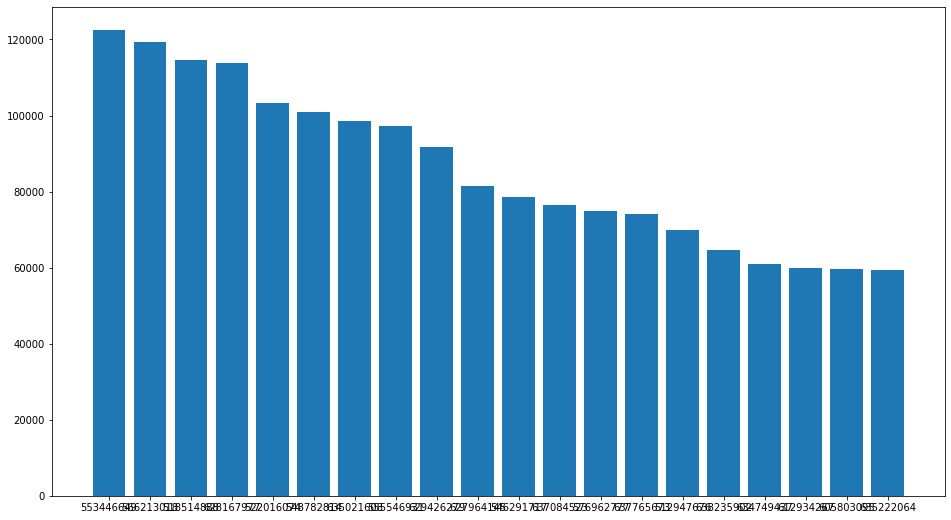

In [18]:
plt.figure(figsize =(16, 9)) 
amount_of_20percent_customers = len(sorted_group_purchase_by_user) * 0.2
#Count % of money that 20% of top customers gave
index_user = [str(i) for i in sorted_group_purchase_by_user.index]
plt.bar(index_user[:20],sorted_group_purchase_by_user[:20])
print('Percent of money 20 % of customers gave out of total {}: {}%'.format(group_purchase_by_product,sum(sorted_group_purchase_by_user[:int(amount_of_20percent_customers)]) /(group_purchase_by_product/100) ))